# Exercises XP

## Exercise 1 : Understanding The Problem And Data Collection
Instructions
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Loading the dataset 
file_path = r'C:\Users\Acer\Desktop\diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
# Count positive and negative cases
positive_cases = df['diabetes'].sum()
negative_cases = len(df) - positive_cases
print("Number of positive cases:", positive_cases)
print("Number of negative cases:", negative_cases)

Number of positive cases: 8500
Number of negative cases: 91500


In [5]:
print(df['gender'].value_counts())
print('-------')
print(df['smoking_history'].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
-------
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [6]:
# Convert the 'gender' and 'smoking_history' columns to categorical type
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

# Use get_dummies to one-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

df_encoded.head()

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0            0             0                        0   
1         0            0             0                        0   
2         0            1             0                        0   
3         0            0             0                        1   
4         0            1             0                        1   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                     0             

In [7]:
# Split the data into features (X) and the target variable (y)
X = df_encoded.drop('diabetes', axis=1)  # Features
y = df_encoded['diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (70000, 13)
X_test shape: (30000, 13)
y_train shape: (70000,)
y_test shape: (30000,)


## Exercise 2 : Model Picking And Standardization
Instructions
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()

<div style="border:solid green 2px; padding: 20px">
Given that this is a medical dataset and the goal is to predict whether an individual has diabetes or not, Logistic Regression is often a good starting point. It's a simple and interpretable model that works well for binary classification problems.
    Models like Logistic Regression, Support Vector Machines, and k-Nearest Neighbors often benefit from feature standardization because they are sensitive to the scale of the input features.

In [8]:
scaler = StandardScaler()

# Fiting the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Exercise 3 : Model Training
Instructions
We will use, the logistic regression model, Train it.

In [9]:
logreg_model = LogisticRegression()

# Train the model on the standardized training data
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

##  Exercise 4 : Evaluation Metrics
Instructions
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.

Accuracy: 0.9592333333333334


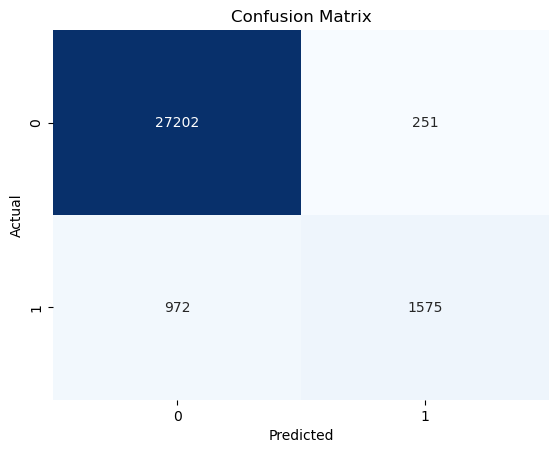

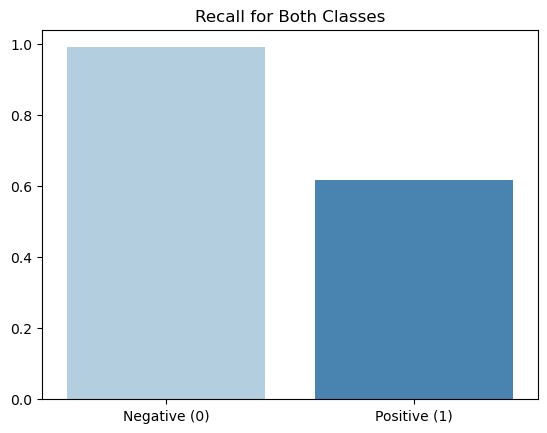

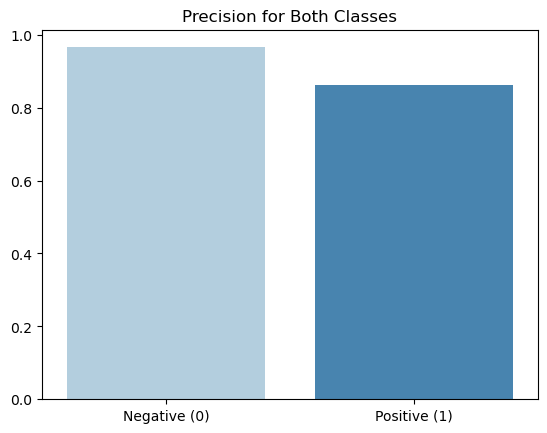

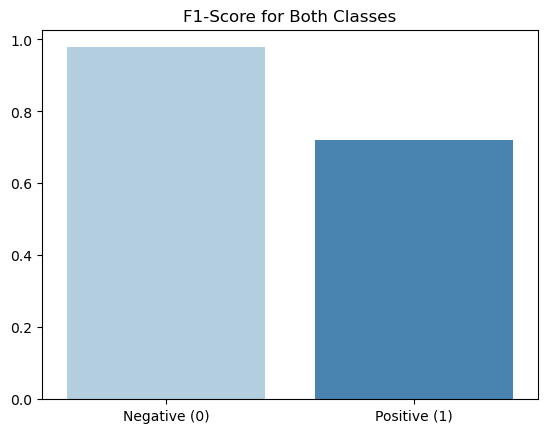

In [10]:
# Using the trained logistic regression model to make predictions on the standardized test data
y_pred = logreg_model.predict(X_test_scaled)

# Ploting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Ploting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ploting Recall, Precision, and F1-Score
report = classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)'], output_dict=True)
sns.barplot(x=['Negative (0)', 'Positive (1)'], y=[report['Negative (0)']['recall'], report['Positive (1)']['recall']], palette='Blues')
plt.title('Recall for Both Classes')
plt.show()

sns.barplot(x=['Negative (0)', 'Positive (1)'], y=[report['Negative (0)']['precision'], report['Positive (1)']['precision']], palette='Blues')
plt.title('Precision for Both Classes')
plt.show()

sns.barplot(x=['Negative (0)', 'Positive (1)'], y=[report['Negative (0)']['f1-score'], report['Positive (1)']['f1-score']], palette='Blues')
plt.title('F1-Score for Both Classes')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- Accuracy: The overall accuracy of the model is approximately 95.92%. This is the proportion of correctly predicted  the target variable (diabetes) - both true positives and true negatives out of the total number of instances. In this context, it means that the model achieved a high overall correctness in predicting whether an individual has diabetes or not.
   
- Confusion Matrix:
The confusion matrix shows how well the model is performing in terms of correctly and incorrectly predicting each class. In this case: True Positives (TP): 1575. The model correctly identified 1575 individuals with diabetes.
    
True Negatives (TN): 27202. The model correctly identified 27202 individuals without diabetes.
    
False Positives (FP): 251. The model incorrectly predicted 251 individuals as having diabetes when they do not.

False Negatives (FN): 972. The model incorrectly predicted 972 individuals as not having diabetes when they do.
The model appears to perform well in terms of true negatives (correctly identifying individuals without diabetes), as indicated by the high value in the top-left corner (27202).
    
There are some false positives (251), indicating instances where the model incorrectly predicted diabetes when it wasn't present.
False negatives (972) suggest instances where the model failed to identify individuals with diabetes.
The analysis should consider the specific context and implications of false positives and false negatives. 
    
- Precision, Recall, F1-Score:
    
Recall for Both Classes:
Negative (0): Approximately 0.96
This suggests that the model correctly identifies around 96% of the individuals without diabetes. A high recall in the negative class indicates a good ability to avoid false negatives for individuals without diabetes.
Positive (1): Approximately 0.62
This indicates that the model identifies around 62% of the individuals with diabetes. The lower recall in the positive class suggests that there is room for improvement in identifying individuals with diabetes.

Precision for Both Classes:
Negative (0): 0.96
This means that among the instances predicted as not having diabetes, 96% are actually true negatives. A high precision in the negative class indicates a low rate of false positives.
Positive (1): 0.86
This means that among the instances predicted as having diabetes, 86% are actually true positives. The precision in the positive class is reasonably high but may still leave room for improvement.

F1-Score for Both Classes:
Negative (0): 0.96
The F1-score for the negative class is high, indicating a good balance between precision and recall for individuals without diabetes.
Positive (1): Approximately 0.7
The F1-score for the positive class is lower, suggesting that there is a trade-off between precision and recall for individuals with diabetes. There may be more false negatives in this class.
    
Precision (Positive Class): Precision is the ratio of correctly predicted positive observations to the total predicted positives.

Recall (Positive Class): Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class. 

F1-Score (Positive Class): The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.


- The model demonstrates strong performance in correctly identifying individuals without diabetes (negative class) with high recall, precision, and F1-score.
However, there is room for improvement in identifying individuals with diabetes (positive class), especially in terms of recall. The lower recall suggests that the model misses a significant portion of individuals with diabetes.
The precision and F1-score for the positive class are reasonably good, but they could be further improved, especially if reducing false negatives (increasing recall) is a priority.
In summary, while the model performs well overall, there is a specific area of improvement in identifying individuals with diabetes, particularly in terms of recall. 

## Exercise 5 : Visualizing The Performance Of Our Model
Instructions
Visualize the decision boundary with accuracy information.

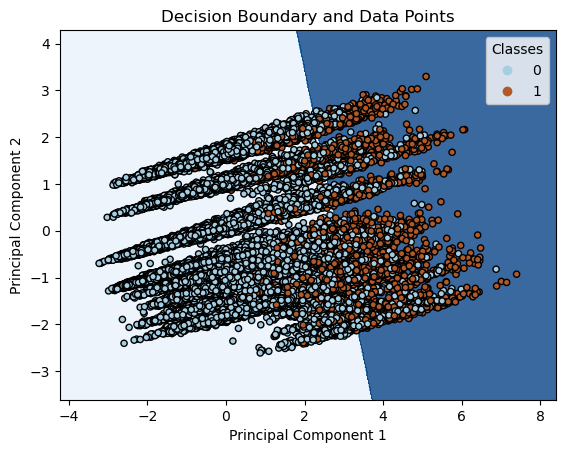

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA to reduce the dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit the logistic regression model on the first two principal components
logreg = LogisticRegression()
logreg.fit(X_pca, y)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)

# Scatter plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Decision Boundary and Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

##  Exercise 6 : ROC Curve
Instructions
Plot the ROC Curve using this code template

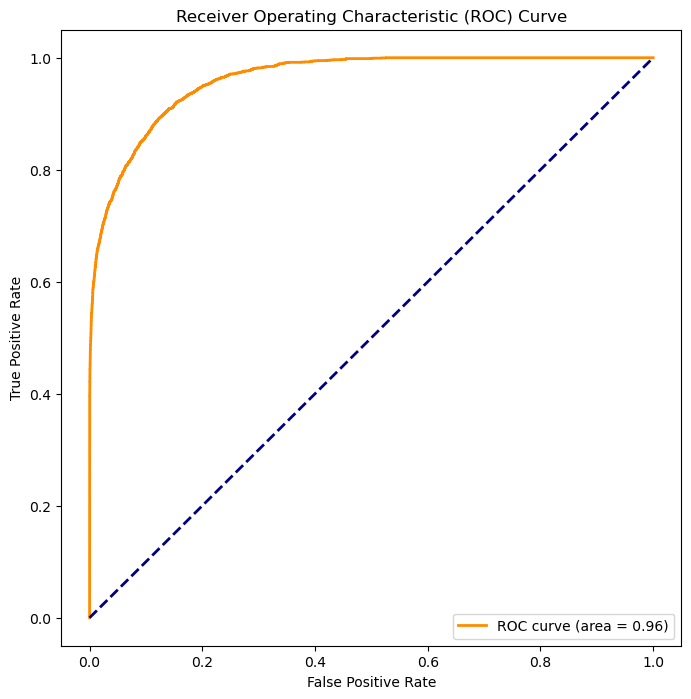

In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
The ROC curve visually shows the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at different probability thresholds.